In [1]:
!pip install xgboost
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

     |████████████████████████████████| 148.9 MB 42 kB/s  eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=691fd12fc3bb84b75134b5220ff8300f9bdd50e2ab4600e025405600f3e5b887
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('pima.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [8]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [9]:
def replace_nan(df, variable):
    median_val=df[variable].median()
    df[variable+'_Nan']=df[variable].fillna(median_val)
    
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_nan(df, feature) 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Nan,BloodPressure_Nan,SkinThickness_Nan,Insulin_Nan,BMI_Nan
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.0,125.0,33.6
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.0,125.0,26.6
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,29.0,125.0,23.3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.1


In [10]:
df=df.drop(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], axis=1)
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_Nan,BloodPressure_Nan,SkinThickness_Nan,Insulin_Nan,BMI_Nan
0,6,0.627,50,1,148.0,72.0,35.0,125.0,33.6
1,1,0.351,31,0,85.0,66.0,29.0,125.0,26.6
2,8,0.672,32,1,183.0,64.0,29.0,125.0,23.3
3,1,0.167,21,0,89.0,66.0,23.0,94.0,28.1
4,0,2.288,33,1,137.0,40.0,35.0,168.0,43.1


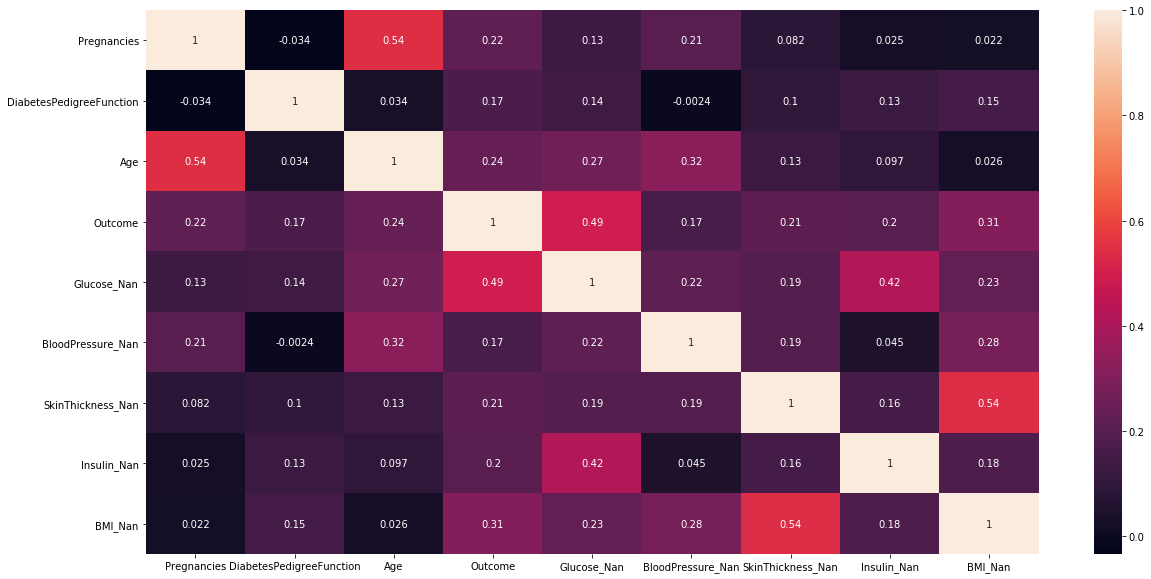

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b50298cd0>,
      dtype=object)

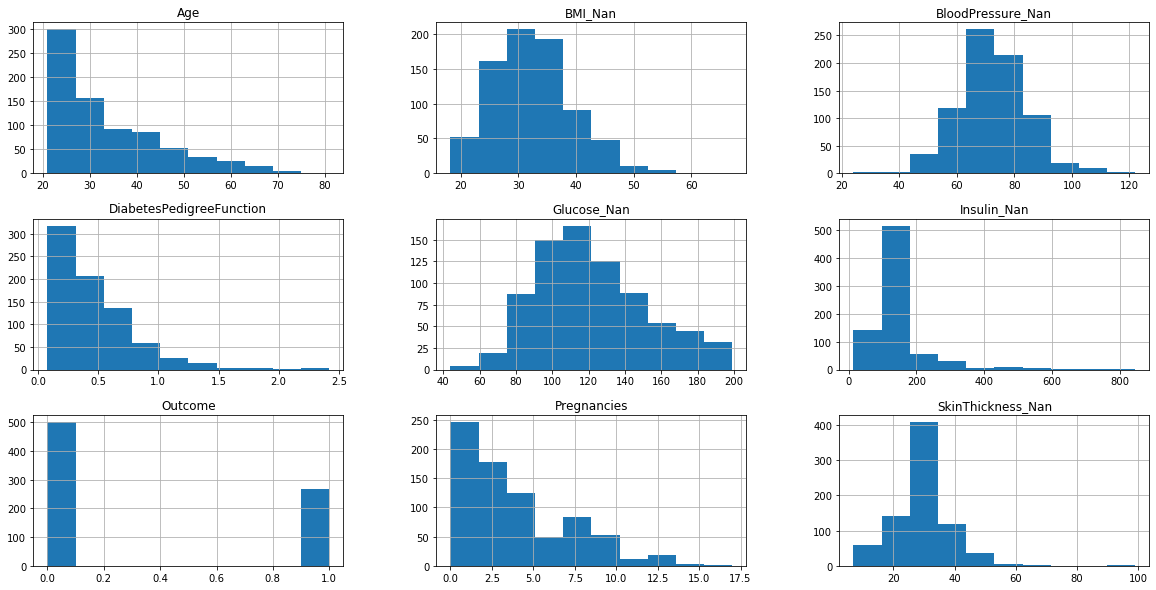

In [12]:
df.hist(figsize=(20,10))

In [13]:
scale_data=[feature for feature in df.columns if feature not in ['Outcome']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scale=scaler.fit(df[scale_data])
scaler.transform(df[scale_data])

array([[ 0.63994726,  0.46849198,  1.4259954 , ...,  0.67064253,
        -0.18154124,  0.16661938],
       [-0.84488505, -0.36506078, -0.19067191, ..., -0.01230129,
        -0.18154124, -0.85219976],
       [ 1.23388019,  0.60439732, -0.10558415, ..., -0.01230129,
        -0.18154124, -1.33250021],
       ...,
       [ 0.3429808 , -0.68519336, -0.27575966, ..., -0.69524511,
        -0.33213179, -0.910418  ],
       [-0.84488505, -0.37110101,  1.17073215, ..., -0.01230129,
        -0.18154124, -0.34279019],
       [-0.84488505, -0.47378505, -0.87137393, ...,  0.21534665,
        -0.18154124, -0.29912651]])

In [14]:
df1=pd.concat([df[['Outcome']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[scale_data]), columns=scale_data)], axis=1)
df1.head()

,Outcome,Pregnancies,DiabetesPedigreeFunction,Age,Glucose_Nan,BloodPressure_Nan,SkinThickness_Nan,Insulin_Nan,BMI_Nan
0,1,0.639947,0.468492,1.425995,0.866045,-0.031990,0.670643,-0.181541,0.166619
1,0,-0.844885,-0.365061,-0.190672,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200
2,1,1.233880,0.604397,-0.105584,2.016662,-0.693761,-0.012301,-0.181541,-1.332500
3,0,-0.844885,-0.920763,-1.041549,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881
4,1,-1.141852,5.484909,-0.020496,0.504422,-2.679076,0.670643,0.316566,1.549303


In [15]:
x=df1.iloc[:,1:].values
y=df1.iloc[:,0].values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


KNN CLASSIFIER

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=13) 
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.66      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154

[[96 11]
 [16 31]]
accuracy is 0.8246753246753247


In [21]:
from sklearn.model_selection import cross_val_score
train_score=[]
test_score=[]
for i in range(1,30):
    clf = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf, x_train, y_train, cv=10)
    score1=cross_val_score(clf, x_test, y_test, cv=10)
    train_score.append(score.mean())
    test_score.append(score1.mean())

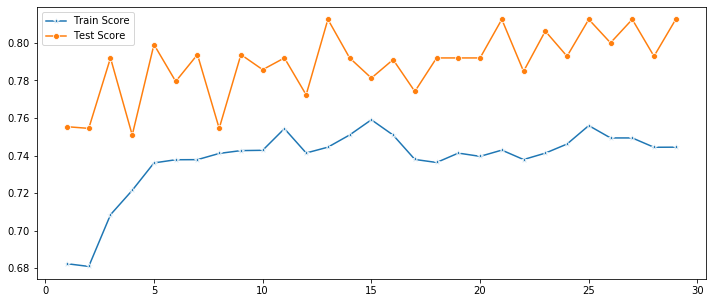

In [22]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30), train_score, marker='*', label='Train Score')
p = sns.lineplot(range(1,30), test_score, marker='o', label='Test Score')



XGBOOST CLASSIFIER

In [23]:
import xgboost

In [24]:
params={'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30],
         'min_child_weight' : [1, 3, 5, 7],
        'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4], 
        'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]}

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [26]:
clf=xgboost.XGBClassifier()

In [27]:
random_search=RandomizedSearchCV(clf, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [28]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.781, total=   0.6s
[CV] min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.848, total=   0.6s
[CV] min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.827, total=   0.6s
[CV] min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.808, total=   0.6s
[CV] min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=30, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.806, total=   0.6s
[CV] min_child_weight=3, max_depth=20, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=20, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3, score=0.731, total=   0.6s
[CV] min_child_weight=3, max_depth=20, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=20, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3, score=0.780, total=   0.5s
[CV] min_child_weight=3, max_depth=2

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   18.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                    

In [29]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=30,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [31]:
clf=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=30,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf, x_train, y_train, cv=10)

In [33]:
score

array([0.73015873, 0.69354839, 0.75806452, 0.81967213, 0.73770492,
       0.81967213, 0.67213115, 0.6557377 , 0.7704918 , 0.78688525])

In [34]:
score.mean()

0.744406671535175

In [36]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       107
           1       0.69      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

[[92 15]
 [14 33]]
accuracy is 0.8116883116883117
